# Loan Default Prediction

#### Importing the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

#### Loading the dataset into a DataFrame

In [6]:
df = pd.read_csv("Loan_default.csv")


In [7]:
df.shape

(148670, 34)

## Part 1: Data Cleaning

#### Using df.head( ) to view all the columns of the dataset

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


#### We can drop the ID and year columns from the dataframe since they do not play a role in the prediction, and the dataset only spans a single year (2019). Similarly, we can drop the secured_by and security_type columns as they contain repetitive values that do not provide any meaningful information for the prediction process.

In [9]:
df = df.drop(columns=['ID', 'year', 'Secured_by', 'Security_Type'])

#### Checking for null values in each column of the dataset

In [10]:
df.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status              

#### To address the null values in our dataset, we will examine the statistics of the affected columns and determine how best to replace the missing data.
#### To achieve this, we created a custom function that calculates the minimum, maximum, mean, median, and mode of a column and displays the results. Although we could have used the describe() method for this purpose, we developed this function to avoid displaying all of the details for each column. The get_stats() function has two parameters: the name of the column for which we require statistics and a boolean value that indicates whether or not to calculate and display the mode. As we don't need the mode for all columns, it will only be computed and shown if the boolean value is set to true

In [11]:
def get_stats(colName, mode):
    print("The minimum value of "+ colName + " is: " + str((df[colName]).min()))
    print("The maximum value of "+ colName + " is: " + str((df[colName]).max()))
    print("The median value of "+ colName + " is: " + str((df[colName]).median()))
    print("The mean value of "+ colName + " is: " + str((df[colName]).mean()))
    if mode == True:
        print("The mode of "+ colName + " is: " + str((df[colName]).mode()[0]))
    return None

#### Statistics of the rate_of_interest column

In [12]:
get_stats("rate_of_interest", False)

The minimum value of rate_of_interest is: 0.0
The maximum value of rate_of_interest is: 8.0
The median value of rate_of_interest is: 3.99
The mean value of rate_of_interest is: 4.045475804367777


#### Statistics of the Interest_rate_spread column

In [13]:
get_stats("Interest_rate_spread", False)

The minimum value of Interest_rate_spread is: -3.638
The maximum value of Interest_rate_spread is: 3.357
The median value of Interest_rate_spread is: 0.3904
The mean value of Interest_rate_spread is: 0.4416556604868295


#### Statistics of the upfront_charges column

In [14]:
get_stats("Upfront_charges", False)

The minimum value of Upfront_charges is: 0.0
The maximum value of Upfront_charges is: 60000.0
The median value of Upfront_charges is: 2596.45
The mean value of Upfront_charges is: 3224.996126591334


#### Statistics of the term column

In [15]:
get_stats("term", True)

The minimum value of term is: 96.0
The maximum value of term is: 360.0
The median value of term is: 360.0
The mean value of term is: 335.1365816899797
The mode of term is: 360.0


#### We observed that the Neg_ammortization column contains only two distinct values. To determine which of these values to use for replacing the null values, we counted the frequency of each value. We will select the value with the highest count as the mode and use it for filling in the missing data.

In [16]:
print(df['Neg_ammortization'].value_counts())

not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64


#### Statistics of the property_value column

In [17]:
get_stats("property_value", True)

The minimum value of property_value is: 8000.0
The maximum value of property_value is: 16508000.0
The median value of property_value is: 418000.0
The mean value of property_value is: 497893.46569640347
The mode of property_value is: 308000.0


#### Statistics of the LTV (Loan to Value Ratio) column

In [18]:
get_stats("LTV", True)

The minimum value of LTV is: 0.967478198
The maximum value of LTV is: 7831.25
The median value of LTV is: 75.13586957
The mean value of LTV is: 72.74645733387138
The mode of LTV is: 81.25


#### Statistics of the DTIR1 (Debt to Income Ratio) column

In [19]:
get_stats("dtir1", True)

The minimum value of dtir1 is: 5.0
The maximum value of dtir1 is: 61.0
The median value of dtir1 is: 39.0
The mean value of dtir1 is: 37.73293242017198
The mode of dtir1 is: 37.0


#### After analyzing the statistics of the affected columns, we filled the null values with the appropriate measure of central tendency. We then verified whether the null values were successfully replaced.

In [20]:
df['income'].fillna(value=df['income'].median(), inplace=True)
df['rate_of_interest'].fillna(value=df['rate_of_interest'].median(), inplace=True)
df['Interest_rate_spread'].fillna(value=df['Interest_rate_spread'].median(), inplace=True)
df['Upfront_charges'].fillna(value=df['Upfront_charges'].mean(), inplace=True)
df['term'].fillna(value=df['term'].mode()[0], inplace=True)
df['Neg_ammortization'].fillna(value=df['Neg_ammortization'].mode()[0], inplace=True)
df['property_value'].fillna(value=df['property_value'].mean(), inplace=True)
df['LTV'].fillna(value=df['LTV'].mean(), inplace=True)
df['dtir1'].fillna(value=df['dtir1'].median(), inplace=True)

df.isnull().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
Neg_ammortization               0
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV                             0
Region                          0
Status                          0
dtir1         

#### We investigated the number of null values in each column and analyzed their relationship with the values in the status column. Specifically, we checked for the column with the maximum number of null values relative to the values in the status column.

In [21]:
null_cols_status_0 = df[df["Status"] == 0].isnull().sum() # we can also use isnull method both are same
null_cols_status_1 = df[df["Status"] == 1].isnull().sum() # we can also use isnull method both are same

print (f"Maximum number of null values in the class 0: {np.max(null_cols_status_0)}")
print (f"Maximum number of null values in the class 1: {np.max(null_cols_status_1)}")

Maximum number of null values in the class 0: 2463
Maximum number of null values in the class 1: 881


#### We observed that the null values were distributed proportionally to the values in the status column. As a result, we concluded that it would be safe to drop the remaining null value rows without losing a significant amount of valuable data.

In [22]:
df.dropna(inplace=True)
print("The number of null values in the dataset is: ", df.isnull().sum().sum())

The number of null values in the dataset is:  0


## Part 2 : Data Analysis

#### In order to improve the display of plots in the exploratory data analysis section, we made a copy of our dataset and converted the categorical variable values of the status column from 0 and 1 to Did not Default and Defaulted.

In [23]:
plot_data = df.copy()
df['Status'] = plot_data['Status'].astype('category')
change={0:'Did not Default',1:'Defaulted'}
plot_data['Status'] = plot_data['Status'].replace(change)

#### Plot 1: A bargraph of the Defaulters and Non-Defaulters, income as the y-axis and split the Loan holders by their genders 

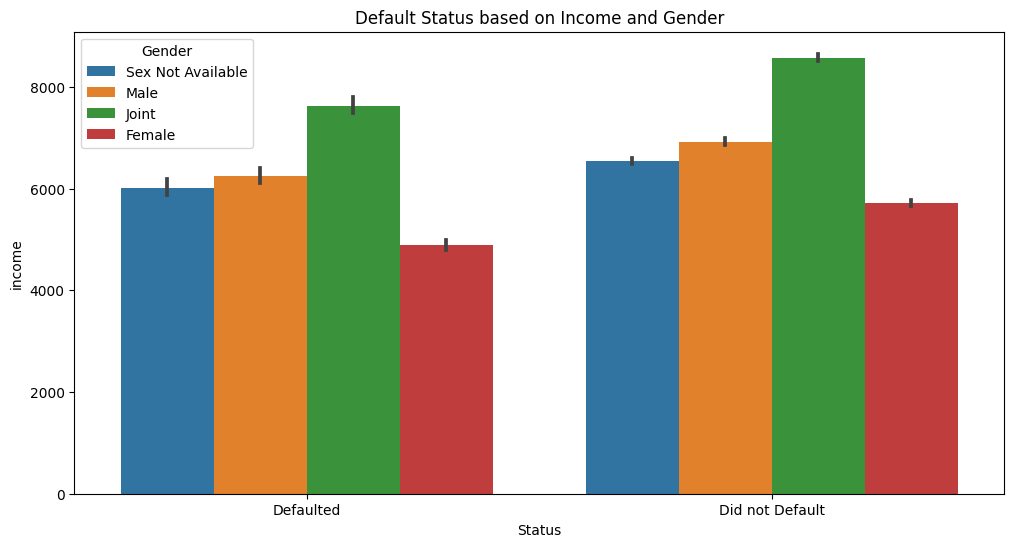

In [26]:
fig, ax = plt.subplots()
sns.barplot(data=plot_data, x='Status', y='income', hue='Gender')
fig.set_size_inches([12,6])
plt.title("Default Status based on Income and Gender")
plt.savefig('Default:Income&Gender.png')
plt.show()

#### Plot 2: A bargraph of the Defaulters and Non-Defaulters, loan_amount as the y-axis and split the Loan holders by their age

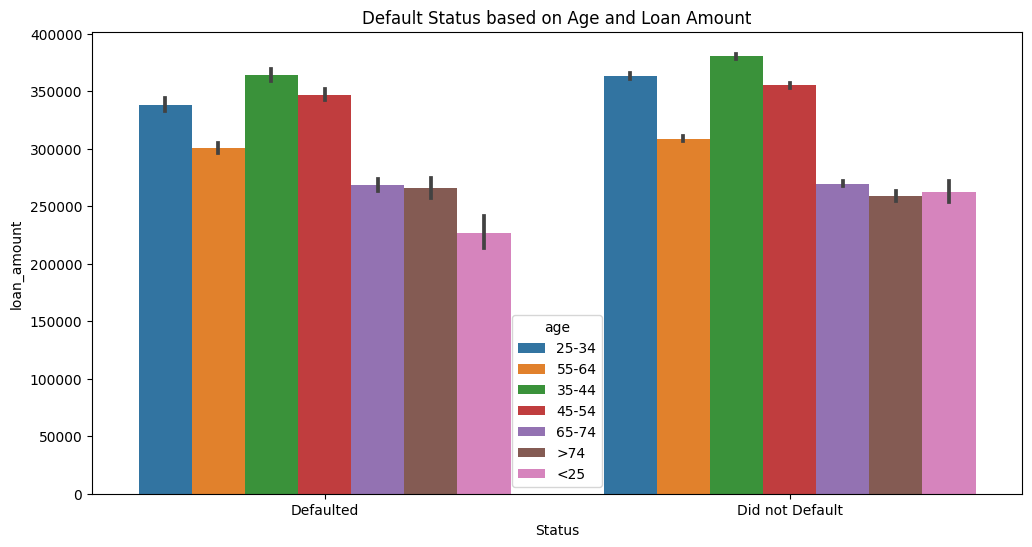

In [27]:
fig,ax=plt.subplots()
sns.barplot(data=plot_data,x='Status',y='loan_amount',hue='age')
fig.set_size_inches([12,6])
plt.title("Default Status based on Age and Loan Amount")
plt.savefig("Default:Age&Amount.png")
plt.show()

#### Plot 3:  Scatter plot of the loan amount vs the property value, and Visualizing the results with the term of the loan as the hue of the scatterplot points

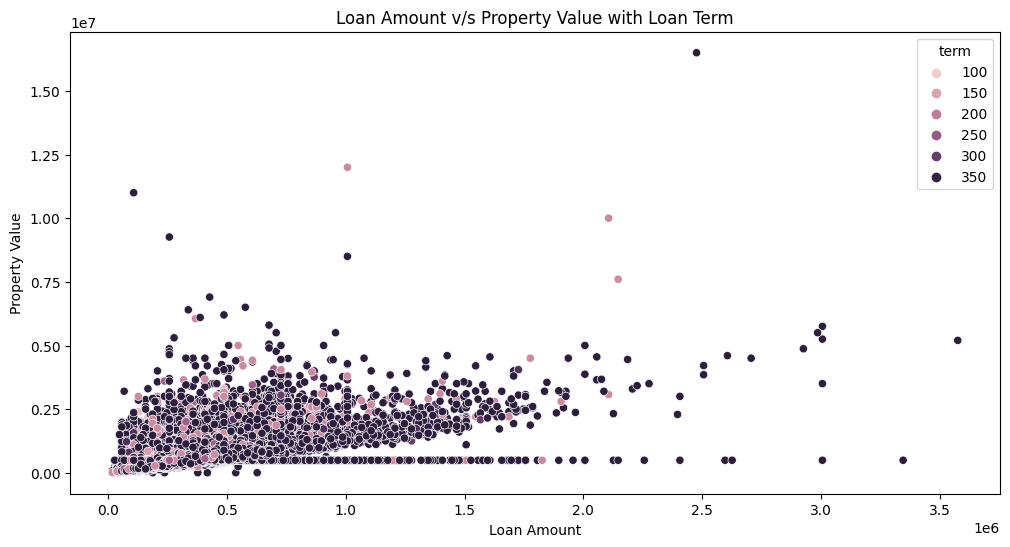

In [28]:
fig,ax=plt.subplots()
sns.scatterplot(data=plot_data, x="loan_amount", y="property_value", hue="term").set(title='Loan Amount v/s Property Value with Loan Term', facecolor="white")
plt.xlabel("Loan Amount")
plt.ylabel("Property Value")
fig.set_size_inches([12,6])
plt.savefig("LoanvsProperty.png")
plt.show()

#### Plot 4: Scatter plot of the loan amount vs. interest rate

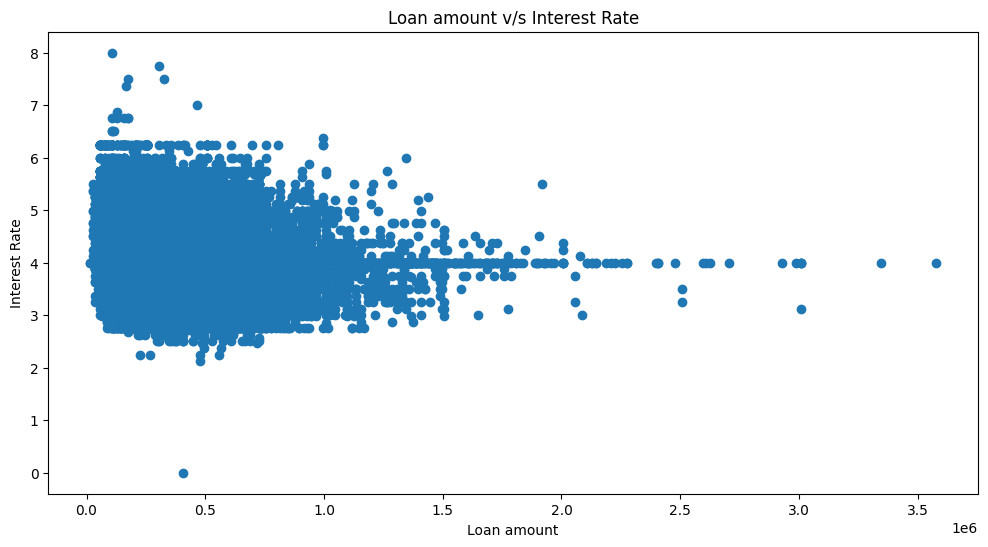

In [29]:
fig,ax=plt.subplots()
plt.scatter(plot_data['loan_amount'],df['rate_of_interest'])
plt.xlabel("Loan amount")
plt.ylabel("Interest Rate")
fig.set_size_inches([12,6])
ax.set_facecolor(color="white")
plt.title("Loan amount v/s Interest Rate")
plt.savefig("LoanvsInterest.png")
plt.show()

## Part 3: Feature Scaling

### a. Categorical Features

#### To analyze the categorical data in our dataset, we first identify the columns with categorical data by looking at the number of unique values in each column. We set a threshold of 10 unique values per column, but we find that none of the columns exceed this threshold. Based on this analysis, we decide to convert these columns to categorical data type for ease of analysis.

In [30]:
n_unique_values = 10
all_columns = df.columns.to_list()
categorical_columns = []

for i, column in enumerate(all_columns):
    temp = df.loc[:, column].unique()
    if len(temp) < n_unique_values:
        print (f"{i+1}. {column} has {len(temp)} unique values, which are {temp}") 
        categorical_columns.append(column)
del temp

1. loan_limit has 2 unique values, which are ['cf' 'ncf']
2. Gender has 4 unique values, which are ['Sex Not Available' 'Male' 'Joint' 'Female']
3. approv_in_adv has 2 unique values, which are ['nopre' 'pre']
4. loan_type has 3 unique values, which are ['type1' 'type2' 'type3']
5. loan_purpose has 4 unique values, which are ['p1' 'p4' 'p3' 'p2']
6. Credit_Worthiness has 2 unique values, which are ['l1' 'l2']
7. open_credit has 2 unique values, which are ['nopc' 'opc']
8. business_or_commercial has 2 unique values, which are ['nob/c' 'b/c']
14. Neg_ammortization has 2 unique values, which are ['not_neg' 'neg_amm']
15. interest_only has 2 unique values, which are ['not_int' 'int_only']
16. lump_sum_payment has 2 unique values, which are ['not_lpsm' 'lpsm']
18. construction_type has 2 unique values, which are ['sb' 'mh']
19. occupancy_type has 3 unique values, which are ['pr' 'sr' 'ir']
20. total_units has 4 unique values, which are ['1U' '2U' '3U' '4U']
22. credit_type has 4 unique value

####  Now creating a new DataFrame with only the categorical columns from the original DataFrame. The Status column is dropped since no normalization or scaling is performed on it as it is the target variable.

In [31]:
cat_columns = df[categorical_columns]
cat_columns = cat_columns.drop(columns=['Status'])
cat_columns.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,1U,EXP,CIB,25-34,to_inst,south
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,1U,EQUI,EXP,55-64,to_inst,North
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,1U,EXP,CIB,35-44,to_inst,south
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,1U,EXP,CIB,45-54,not_inst,North
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,1U,CRIF,EXP,25-34,not_inst,North


#### In the code block above, we use the pd.get_dummies() function to one-hot-encode the categorical column data. This function converts each categorical value in the column into a separate binary column, which contains a 1 or 0 depending on whether that value is present in the original column. This makes it easier for our machine learning model to process the data and understand the relationships between the features. We then drop the original categorical columns, as they are no longer needed.

In [32]:
cat_col_oneHot = pd.get_dummies(cat_columns)
cat_col_oneHot.head()

,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l1,Credit_Worthiness_l2,open_credit_nopc,open_credit_opc,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,interest_only_int_only,interest_only_not_int,lump_sum_payment_lpsm,lump_sum_payment_not_lpsm,construction_type_mh,construction_type_sb,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south
0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0


### b. Numeric Features

#### Copying the numeric columns from our original DataFrame into a new DataFrame

In [33]:
num_columns = df.drop(categorical_columns, axis=1)
num_columns.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,116500,3.99,0.3904,3224.996127,360.0,118000.000000,1740.0,758,98.728814,45.0
1,206500,3.99,0.3904,3224.996127,360.0,497893.465696,4980.0,552,72.746457,39.0
2,406500,4.56,0.2000,595.000000,360.0,508000.000000,9480.0,834,80.019685,46.0
3,456500,4.25,0.6810,3224.996127,360.0,658000.000000,11880.0,587,69.376900,42.0
4,696500,4.00,0.3042,0.000000,360.0,758000.000000,10440.0,602,91.886544,39.0


#### Here, we use sklearn's MinMaxScaler() function to normalize the numeric data. The purpose of normalization is to scale all features to a similar range and prevent certain features from having a larger influence on the model due to their larger magnitude. The MinMaxScaler() function calculates the minimum and maximum values of a column and scales each value in the column between 0 and 1, preserving the proportion of the data. This ensures that each column has an equal impact on the model's prediction.

In [34]:
scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(num_columns)
num_scaled

array([[0.02808989, 0.49875   , 0.57589707, ..., 0.645     , 0.01248503,
        0.71428571],
       [0.05337079, 0.49875   , 0.57589707, ..., 0.13      , 0.00916684,
        0.60714286],
       [0.10955056, 0.57      , 0.54867763, ..., 0.835     , 0.0100957 ,
        0.73214286],
       ...,
       [0.12078652, 0.390625  , 0.53175125, ..., 0.505     , 0.00770916,
        0.78571429],
       [0.0505618 , 0.4375    , 0.60334525, ..., 0.5925    , 0.00890338,
        0.42857143],
       [0.10955056, 0.546875  , 0.71838456, ..., 0.825     , 0.00918   ,
        0.69642857]])

####  MinMaxScaler( ) output is an array, we will create a DataFrame with the normalized values

In [35]:
num_scaled_df = pd.DataFrame(num_scaled, index=num_columns.index, columns=num_columns.columns)
num_scaled_df

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,0.028090,0.498750,0.575897,0.053750,1.000000,0.006667,0.003007,0.6450,0.012485,0.714286
1,0.053371,0.498750,0.575897,0.053750,1.000000,0.029691,0.008607,0.1300,0.009167,0.607143
2,0.109551,0.570000,0.548678,0.009917,1.000000,0.030303,0.016385,0.8350,0.010096,0.732143
3,0.123596,0.531250,0.617441,0.053750,1.000000,0.039394,0.020533,0.2175,0.008737,0.660714
4,0.191011,0.500000,0.563574,0.000000,1.000000,0.045455,0.018044,0.2550,0.011611,0.607143
...,...,...,...,...,...,...,...,...,...,...
148665,0.117978,0.390625,0.556841,0.166000,0.318182,0.036364,0.013585,0.3975,0.009045,0.767857
148666,0.160112,0.648750,0.642230,0.000000,1.000000,0.047273,0.012341,0.1725,0.009382,0.178571
148667,0.120787,0.390625,0.531751,0.020444,0.318182,0.043636,0.011926,0.5050,0.007709,0.785714
148668,0.050562,0.437500,0.603345,0.072056,0.318182,0.016364,0.012341,0.5925,0.008903,0.428571


#### Next, we combine our normalized categorical and numeric columns into a single DataFrame, named x_data, which includes all of our standardized features. Additionally, we create a separate DataFrame, y_data, to hold our target variable, "Status". We print the shape of both DataFrames to ensure the number of data points is consistent.

#### By combining the categorical and numeric columns into a single DataFrame, we are able to use both sets of features for our model. Using MinMaxScaler( ) ensures that the numeric data is scaled proportionately without losing any valuable information.

In [36]:
x_data = num_scaled_df.join(cat_col_oneHot)
y_data = df['Status']
print(x_data.shape)
print(y_data.shape)

(144104, 65)
(144104,)


In [37]:
x_data.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l1,Credit_Worthiness_l2,open_credit_nopc,open_credit_opc,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,interest_only_int_only,interest_only_not_int,lump_sum_payment_lpsm,lump_sum_payment_not_lpsm,construction_type_mh,construction_type_sb,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south
0,0.028090,0.49875,0.575897,0.053750,1.0,0.006667,0.003007,0.6450,0.012485,0.714286,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.053371,0.49875,0.575897,0.053750,1.0,0.029691,0.008607,0.1300,0.009167,0.607143,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0.109551,0.57000,0.548678,0.009917,1.0,0.030303,0.016385,0.8350,0.010096,0.732143,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.123596,0.53125,0.617441,0.053750,1.0,0.039394,0.020533,0.2175,0.008737,0.660714,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0.191011,0.50000,0.563574,0.000000,1.0,0.045455,0.018044,0.2550,0.011611,0.607143,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0


#### Now, using sklearn's train_test_split, we split our data into training and testing sets which is  60% of our data to train our models, and 40% of our data to test them.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=47)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(86462, 65)
(86462,)
(57642, 65)
(57642,)


## Part 4: Modelling and Prediction

#### To visualise each model's confusion matrix, we create function that takes in the confusion matrix as a function argument, and creates and returns a seaborn heatmap of the results

In [39]:
def create_heatmap(cf_matrix):
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

### Model 1: Random Forest Classifier

#### We will use RandomForestClassifier and We fit it with our training sets, and then predict the values using our test set. And also evaluating our model performance using the accuracy_score,  f1_score, classification_report and confusion_matrix functions from sklearn.

Test Accuracy:  1.0
Weighted F1 score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43536
           1       1.00      1.00      1.00     14106

    accuracy                           1.00     57642
   macro avg       1.00      1.00      1.00     57642
weighted avg       1.00      1.00      1.00     57642

AxesSubplot(0.125,0.11;0.62x0.77)


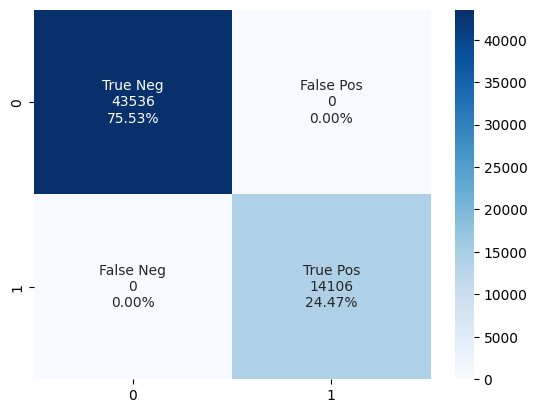

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred_RF = clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred_RF))
print("Weighted F1 score: ", f1_score(y_test, y_pred_RF, average='weighted'))
class_report_RF = classification_report(y_test, y_pred_RF)
print(class_report_RF)
cf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print(create_heatmap(cf_matrix_RF))

### Model 2: Decision Tree

#### Now using the DecisionTreeClassifier. We fit it with our training sets , and then predict the values using our test set and evaluating our model performance using the accuracy_score, f1_score, classification_report and confusion_matrix functions from sklearn.

Test Accuracy:  0.9999826515388085
Weighted F1 score:  0.9999826517466411
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43536
           1       1.00      1.00      1.00     14106

    accuracy                           1.00     57642
   macro avg       1.00      1.00      1.00     57642
weighted avg       1.00      1.00      1.00     57642

AxesSubplot(0.125,0.11;0.62x0.77)


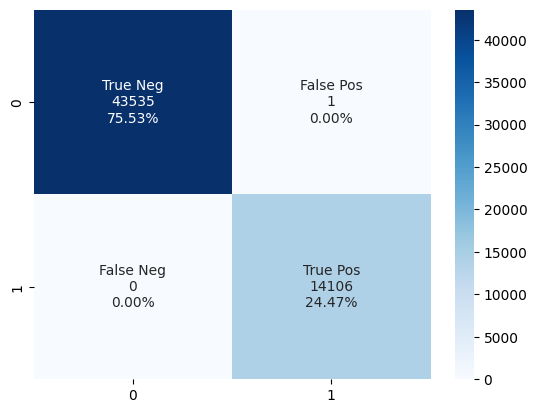

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_DT = clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred_DT))
print("Weighted F1 score: ", f1_score(y_test, y_pred_DT, average='weighted'))
print(classification_report(y_test, y_pred_DT))
cf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print(create_heatmap(cf_matrix_DT))

### Model 3: K-Nearest Neighbours

#### We use the KNeighborsClassifier from sklearn.ensemble as our model here. We fit it with our training sets, and then predict the values using our test set. We then evaluate our model performance using the accuracy_score, f1_score, classification_report, and confusion_matrix functions from sklearn.

Test Accuracy:  0.8523472467992089
Weighted F1 score:  0.8391856698408355
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     43536
           1       0.82      0.51      0.63     14106

    accuracy                           0.85     57642
   macro avg       0.84      0.74      0.77     57642
weighted avg       0.85      0.85      0.84     57642

AxesSubplot(0.125,0.11;0.62x0.77)


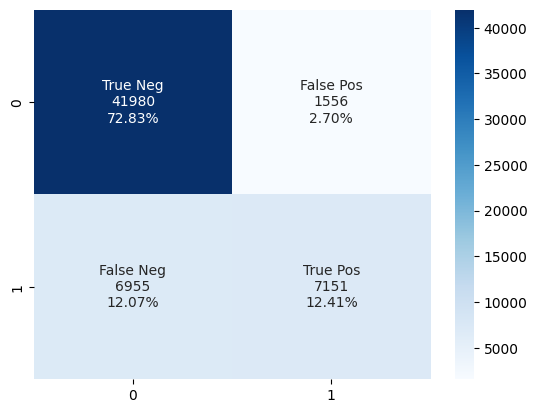

In [42]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred_KNN = clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred_KNN))
print("Weighted F1 score: ", f1_score(y_test, y_pred_KNN, average='weighted'))
print(classification_report(y_test, y_pred_KNN))
cf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
print(create_heatmap(cf_matrix_KNN))

### Model 4: Gaussian Naïve Bayes

#### Now Using Gaussian Naive Bayes from the scikit-learn library to build a classification model. First, we fit the model to our training data  using the fit function. Next, we use the predict function to make predictions on the test data . And evaluating the performance of our model using various metrics provided by scikit-learn, including accuracy_score, f1_score, classification_report, and confusion_matrix.

Test Accuracy:  0.8969501405225356
Weighted F1 score:  0.886503654215161
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     43536
           1       1.00      0.58      0.73     14106

    accuracy                           0.90     57642
   macro avg       0.94      0.79      0.83     57642
weighted avg       0.91      0.90      0.89     57642

AxesSubplot(0.125,0.11;0.62x0.77)


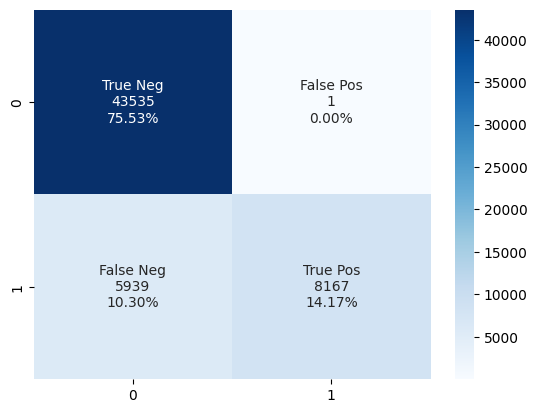

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))
print("Weighted F1 score: ", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
print(create_heatmap(cf_matrix))

### Model 5: Support Vector Machine

#### Using the SVM (Support Vector Machine) model from scikit-learn library, we train our model on the training data using svm.SVC() function. After fitting the model, we make predictions on the test data using the predict function. Finally, we evaluate the performance of our model using various metrics provided by scikit-learn such as accuracy_score, f1_score, classification_report, and confusion_matrix.

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred_SVM = clf.predict(x_test)
print('Test Accuracy: ', accuracy_score(y_test, y_pred_SVM))
print("Weighted F1 score: ", f1_score(y_test, y_pred_SVM, average='weighted'))
print(classification_report(y_test, y_pred_SVM))
cf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print(create_heatmap(cf_matrix_SVM))

### Model 6: Artificial Neural Network (A Multi-Layer Perceptron)

#### We use the MLPClassifier from sklearn.neural_network as our model here. We fit it with our training sets (x_train and y_train). We then evaluate our model performance using mlp.score( ) by passing it our x_train and y_train sets for a training accuracy, and our x_test and y_test sets for a testing accuracy.

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes = (30, 30),
    activation = 'relu',
    alpha = 1e-5,
    learning_rate = 'adaptive',
    learning_rate_init = 1e-3,
    tol = 1e-6,
    early_stopping = True,
    validation_fraction = 2e-1,
    n_iter_no_change = 50,
    max_iter = 1000,
    solver = 'adam', # 'lbfgs', 'sgd'
)

print(mlp.fit(x_train.to_numpy(), y_train))

print(f"iterations ran: {mlp.n_iter_}")
print(f"Train score: {mlp.score(x_train.to_numpy(), y_train)}")
print(f"Test score: {mlp.score(x_test.to_numpy(), y_test)}")

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(30, 30),
              learning_rate='adaptive', max_iter=1000, n_iter_no_change=50,
              tol=1e-06, validation_fraction=0.2)
iterations ran: 374
Train score: 0.9965418334065832
Test score: 0.9950903854828077
